In [2]:
# First let's import the packages we will use in this project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
from scipy.stats import linregress
import plotly.offline as pyoff 
import plotly.graph_objs as go 
from datetime import datetime
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [72]:
from pandas import read_csv

data = read_csv(r"Sales prediction.csv", engine='python',encoding='latin1')

data

,CustomerID,CustomerCategoryName,StockItemID,StateProvinceName,CityName,Population,TotalSales,LineProfit,Year,Month,TransactionDate
0,1,Novelty Shop,21,Nebraska,Lisco,1943256,1490.0,34.0,2013,1,1/1/2013
1,1,Novelty Shop,33,Nebraska,Lisco,1943256,4348.0,34.0,2013,1,1/1/2013
2,1,Novelty Shop,34,Nebraska,Lisco,1943256,104.0,25.5,2013,1,1/1/2013
3,1,Novelty Shop,38,Nebraska,Lisco,1943256,104.0,42.5,2013,1,1/1/2013
4,1,Novelty Shop,44,Nebraska,Lisco,1943256,749.0,42.5,2013,1,1/1/2013
...,...,...,...,...,...,...,...,...,...,...,...
225792,1028,Gift Store,144,Colorado,Wray,5698265,2688.0,-96.0,2016,5,5/31/2016
225793,1028,Gift Store,172,Colorado,Wray,5698265,2688.0,500.0,2016,5,5/31/2016
225794,1053,Computer Store,19,Texas,Linden,27506120,283.0,25.5,2016,5,5/31/2016
225795,1053,Computer Store,33,Texas,Linden,27506120,283.0,85.0,2016,5,5/31/2016


In [4]:
data.dtypes

CustomerID                int64
CustomerCategoryName     object
StockItemID               int64
StateProvinceName        object
CityName                 object
Population                int64
TotalSales              float64
LineProfit              float64
Year                      int64
Month                     int64
TransactionDate          object
dtype: object

In [73]:
data.TransactionDate  = data.TransactionDate .astype('datetime64[ns]')
data

,CustomerID,CustomerCategoryName,StockItemID,StateProvinceName,CityName,Population,TotalSales,LineProfit,Year,Month,TransactionDate
0,1,Novelty Shop,21,Nebraska,Lisco,1943256,1490.0,34.0,2013,1,2013-01-01
1,1,Novelty Shop,33,Nebraska,Lisco,1943256,4348.0,34.0,2013,1,2013-01-01
2,1,Novelty Shop,34,Nebraska,Lisco,1943256,104.0,25.5,2013,1,2013-01-01
3,1,Novelty Shop,38,Nebraska,Lisco,1943256,104.0,42.5,2013,1,2013-01-01
4,1,Novelty Shop,44,Nebraska,Lisco,1943256,749.0,42.5,2013,1,2013-01-01
...,...,...,...,...,...,...,...,...,...,...,...
225792,1028,Gift Store,144,Colorado,Wray,5698265,2688.0,-96.0,2016,5,2016-05-31
225793,1028,Gift Store,172,Colorado,Wray,5698265,2688.0,500.0,2016,5,2016-05-31
225794,1053,Computer Store,19,Texas,Linden,27506120,283.0,25.5,2016,5,2016-05-31
225795,1053,Computer Store,33,Texas,Linden,27506120,283.0,85.0,2016,5,2016-05-31


In [6]:
data.describe()

,CustomerID,StockItemID,Population,TotalSales,LineProfit,Year,Month
count,225797.000000,225797.000000,2.257970e+05,225797.000000,225797.000000,225797.000000,225797.000000
mean,468.428292,110.204950,6.387712e+06,2817.781866,375.363740,2014.306160,6.089735
std,384.161579,63.737065,7.385087e+06,2956.561472,753.393004,1.002338,3.426546
min,1.000000,1.000000,6.059640e+05,4.800000,-645.000000,2013.000000,1.000000
25%,1.000000,54.000000,1.943256e+06,888.000000,51.000000,2013.000000,3.000000
50%,401.000000,111.000000,5.698265e+06,2018.000000,120.000000,2014.000000,6.000000
75%,878.000000,165.000000,5.698265e+06,3528.000000,390.000000,2015.000000,9.000000
max,1061.000000,227.000000,4.146045e+07,42103.000000,9200.000000,2016.000000,12.000000


In [7]:
data.shape

(225797, 11)

In [8]:
data.isnull().sum()

CustomerID              0
CustomerCategoryName    0
StockItemID             0
StateProvinceName       0
CityName                0
Population              0
TotalSales              0
LineProfit              0
Year                    0
Month                   0
TransactionDate         0
dtype: int64

In [9]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

CustomerID - 0%
CustomerCategoryName - 0%
StockItemID - 0%
StateProvinceName - 0%
CityName - 0%
Population - 0%
TotalSales - 0%
LineProfit - 0%
Year - 0%
Month - 0%
TransactionDate - 0%


In [10]:
sales_per_location = data.groupby(["Year","StateProvinceName"]).sum()
sales_per_location

CustomerID  StockItemID   Population  TotalSales  \
Year StateProvinceName                                                     
2013 Alabama                146342        19515    913462704   458027.05   
     Alaska                 397883        49861    332279664  1318046.85   
     Arizona                279620        32134   2012372896   827290.15   
     Arkansas               536907        59519   1686605356  1321560.10   
     California            1141379       141080  52488933498  3420691.25   
...                            ...          ...          ...         ...   
2016 Virginia               188092        25556   1751205860   696929.50   
     Washington             142563        17430   1131040800   360496.05   
     West Virginia          254981        32192    581949081   865631.55   
     Wisconsin              160995        18293   1012444671   508140.80   
     Wyoming                111852        15982     80593212   347699.15   

                        LineProfit  Month  
Year StateProvinceName                     
2013 Alabama              61101.95   1061  
     Alaska              185155.20   3076  
     Arizona             108596.60   1886  
     Arkansas            174524.60   3979  
     California          476297.65   8487  
...                            ...    ...  
2016 Virginia             95311.75    709  
     Washington           50447.65    561  
     West Virginia       108065.85    878  
     Wisconsin            75034.30    524  
     Wyoming              45709.80    393  

[189 rows x 6 columns]

In [11]:
sales_State = data.groupby(["Year", "StateProvinceName",]).sum()
sales_State['LineProfit'].nlargest(n=10)

Year  StateProvinceName
2015  Colorado             8381990.95
      Nebraska             8220915.30
2014  Colorado             7900869.20
      Nebraska             7843496.40
2013  Nebraska             7593428.80
      Colorado             7406701.80
2016  Colorado             3396354.75
      Nebraska             3389755.35
2015  Texas                 708363.05
2014  Texas                 675233.80
Name: LineProfit, dtype: float64

In [64]:
data = data.sort_values(by=['LineProfit'], inplace=False, ascending=False)
data.head()

,Year,Month,TotalSales,LineProfit
30,2015,7,18857660.30,2555744.65
27,2015,4,18974631.30,2489665.00
40,2016,5,18378887.15,2420775.30
18,2014,7,17887709.70,2355452.10
32,2015,9,17146455.45,2285513.70


In [20]:
pd.set_option('display.max_rows', None)

In [13]:
unique_CustomerCategory = data['CustomerCategoryName'].drop_duplicates().sort_values(ascending=False)
unique_CustomerCategory.head()

166657       Supermarket
23477       Novelty Shop
108716        Gift Store
108553         Corporate
32073     Computer Store
Name: CustomerCategoryName, dtype: object

In [63]:
# numerizing the category columns to see the correlation between all features

data_numerized = data
for col_name in data_numerized.columns:
    if (data_numerized[col_name].dtype == 'object'):
        data_numerized[col_name] = data_numerized[col_name].astype('category')
        data_numerized[col_name] = data_numerized[col_name].cat.codes
data_numerized.head() 

,Year,Month,TotalSales,LineProfit
0,2013,1,13519763.40,1868166.20
1,2013,2,10222160.45,1366368.70
2,2013,3,14504140.75,1899833.65
3,2013,4,14607753.35,1997153.35
4,2013,5,16353984.35,2205917.30


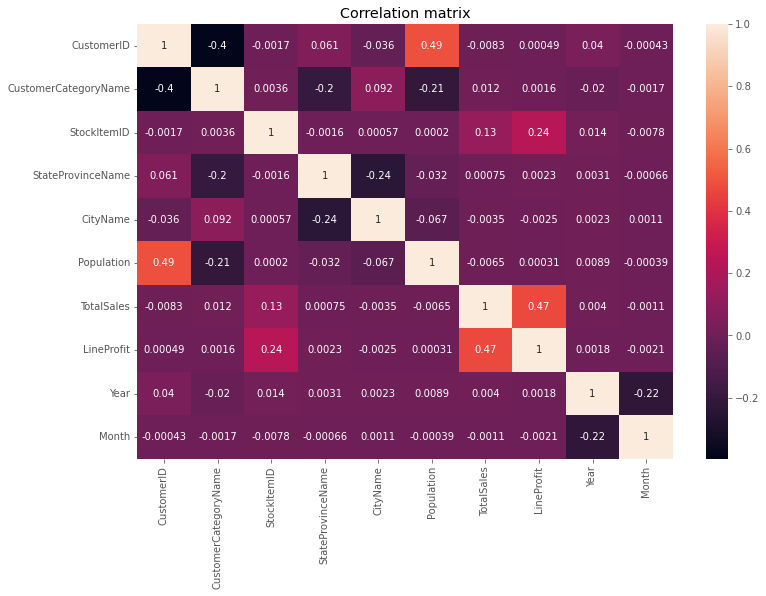

In [15]:
#heatmap for all the feachures
correlation_matrix = data_numerized.corr()

sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation matrix")
plt.show()

In [22]:
correlation_mat = data_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs.head()

CustomerID  CustomerID              1.000000
            CustomerCategoryName   -0.396085
            StockItemID            -0.001673
            StateProvinceName       0.060531
            CityName               -0.035725
dtype: float64

In [25]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs.head(10)

CustomerID            CustomerCategoryName   -0.396085
CustomerCategoryName  CustomerID             -0.396085
CityName              StateProvinceName      -0.243339
StateProvinceName     CityName               -0.243339
Year                  Month                  -0.221207
Month                 Year                   -0.221207
Population            CustomerCategoryName   -0.208285
CustomerCategoryName  Population             -0.208285
StateProvinceName     CustomerCategoryName   -0.196888
CustomerCategoryName  StateProvinceName      -0.196888
dtype: float64

In [29]:
#let's find the high correlated pairs

high_corr = sorted_pairs[(sorted_pairs)> 0.4]
high_corr.head()

TotalSales  LineProfit    0.466870
LineProfit  TotalSales    0.466870
Population  CustomerID    0.492448
CustomerID  Population    0.492448
            CustomerID    1.000000
dtype: float64

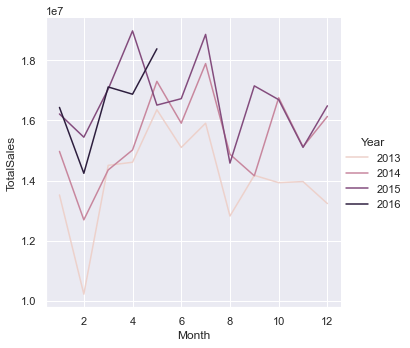

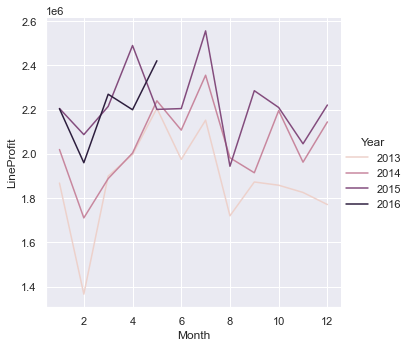

In [53]:
sns.relplot(data=data, x='Month', y='TotalSales', hue='Year', kind='line', facet_kws={'sharey': False, 'sharex': True})
sns.relplot(data=data, x='Month', y='LineProfit', hue='Year', kind='line', facet_kws={'sharey': False, 'sharex': True})

plt.show()

In [74]:
data = data.set_index("TransactionDate")
data

,CustomerID,CustomerCategoryName,StockItemID,StateProvinceName,CityName,Population,TotalSales,LineProfit,Year,Month
TransactionDate,,,,,,,,,,
2013-01-01,1,Novelty Shop,21,Nebraska,Lisco,1943256,1490.0,34.0,2013,1
2013-01-01,1,Novelty Shop,33,Nebraska,Lisco,1943256,4348.0,34.0,2013,1
2013-01-01,1,Novelty Shop,34,Nebraska,Lisco,1943256,104.0,25.5,2013,1
2013-01-01,1,Novelty Shop,38,Nebraska,Lisco,1943256,104.0,42.5,2013,1
2013-01-01,1,Novelty Shop,44,Nebraska,Lisco,1943256,749.0,42.5,2013,1
...,...,...,...,...,...,...,...,...,...,...
2016-05-31,1028,Gift Store,144,Colorado,Wray,5698265,2688.0,-96.0,2016,5
2016-05-31,1028,Gift Store,172,Colorado,Wray,5698265,2688.0,500.0,2016,5
2016-05-31,1053,Computer Store,19,Texas,Linden,27506120,283.0,25.5,2016,5


In [77]:
monthly_profit = data[["LineProfit","Year"]].resample('MS').mean()
yearly_profit = monthly_profit.groupby("Year").sum("LineProfit")
yearly_profit

,LineProfit
Year,
2013.0,4478.221227
2014.0,4511.861103
2015.0,4502.817390
2016.0,1895.134767


<AxesSubplot:title={'center':'Total Profit'}, xlabel='TransactionDate', ylabel='LineProfit'>

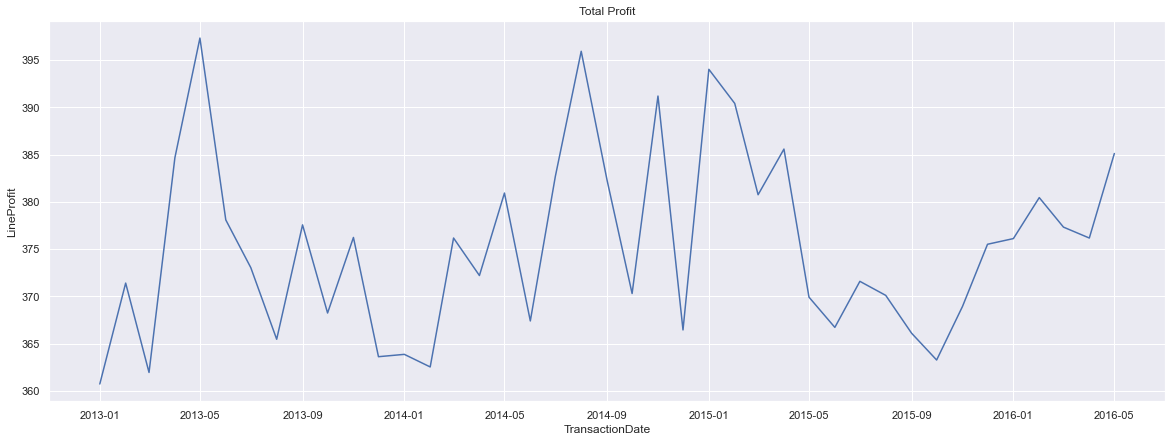

In [82]:
plt.title("Total Profit")
sns.set(rc={'figure.figsize':(20, 7)})
sns.lineplot(data=monthly_profit, x=monthly_profit.index, y='LineProfit')
